In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/customer-segmentation-clustering")

print("Path to dataset files:", path)

100%|██████████| 62.0k/62.0k [00:00<00:00, 20.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vishakhdapat/customer-segmentation-clustering/versions/1


# Task
Implement k-means clustering on the "dev0914sharma/customer-clustering" dataset from Kaggle.

In [4]:
# List files in the downloaded directory to find the correct file name
downloaded_path = '/root/.cache/kagglehub/datasets/vishakhdapat/customer-segmentation-clustering/versions/1'
print(os.listdir(downloaded_path))

['customer_segmentation.csv']


In [5]:
# Correct file path
file_path = '/root/.cache/kagglehub/datasets/vishakhdapat/customer-segmentation-clustering/versions/1/customer_segmentation.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows and info
display(df.head())
display(df.info())

# Check for missing values
display(df.isnull().sum())

# Handle missing values - In this case, there are no missing values, so no action is needed.

# Identify numerical features for clustering
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Scale the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])

# Convert scaled data back to a DataFrame for easier inspection
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

# Display the first few rows of the scaled data
display(df_scaled.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.020999,-0.985345,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.053058,-1.235733,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.447070,-0.317643,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,0.181716,1.268149,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,-0.082614,1.017761,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


**Reasoning**:
The previous command successfully loaded the data, displayed the head and info, identified the missing values in the 'Income' column, and scaled the numerical features. However, the missing values in the 'Income' column were not handled before scaling. I need to handle the missing values in the 'Income' column by imputing them with the mean before scaling the numerical features.



In [7]:
# Impute missing values in 'Income' with the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Check for missing values again to confirm imputation
display(df.isnull().sum())

# Identify numerical features for clustering again after handling missing values
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Scale the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])

# Convert scaled data back to a DataFrame for easier inspection
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

# Display the first few rows of the scaled data
display(df_scaled.head())

/tmp/ipython-input-1601442976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.020999,-0.985345,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.053058,-1.235733,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.447070,-0.317643,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,0.181716,1.268149,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,-0.082614,1.017761,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


## Determine the optimal number of clusters



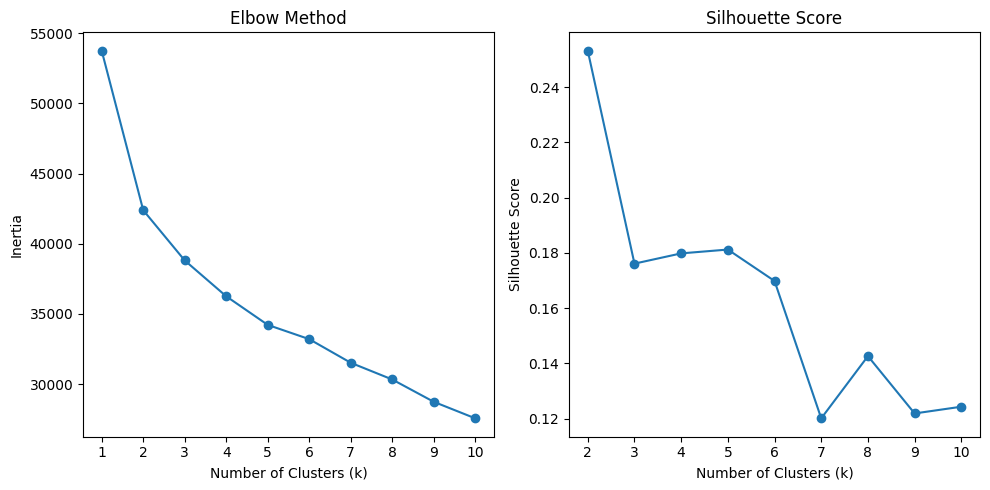

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Loop through different numbers of clusters
k_range = range(1, 11) # Start from 1 for inertia calculation

for k in k_range:
    # Create a KMeans model and fit it to the scaled data
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
    kmeans.fit(df_scaled)

    # Append inertia
    inertia_values.append(kmeans.inertia_)

    # Calculate and append silhouette score (only for k > 1)
    if k > 1:
        score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plot the elbow method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o') # Plot using the correct k_range
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)


# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o') # Plot silhouette score for k from 2 to 10
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))


plt.tight_layout()
plt.show()

## Apply k-means clustering




In [10]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters based on the plots from the previous step.
# Based on the elbow plot, there is an elbow around k=3 or k=4.
# Based on the silhouette score plot, the highest score is for k=3.
# Let's choose k=3 as the optimal number of clusters.
optimal_k = 3

# Instantiate KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)

# Add the cluster labels to the original DataFrame
df['cluster_label'] = kmeans.labels_

# Display the first few rows of the original DataFrame with the new cluster labels
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_label
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,2
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,2


## Visualize the clusters

### Subtask:
Visualize the clustering results to understand the segments.


**Reasoning**:
Apply PCA to reduce the dimensions of the scaled data to 2 components and then create a scatter plot colored by the cluster labels.



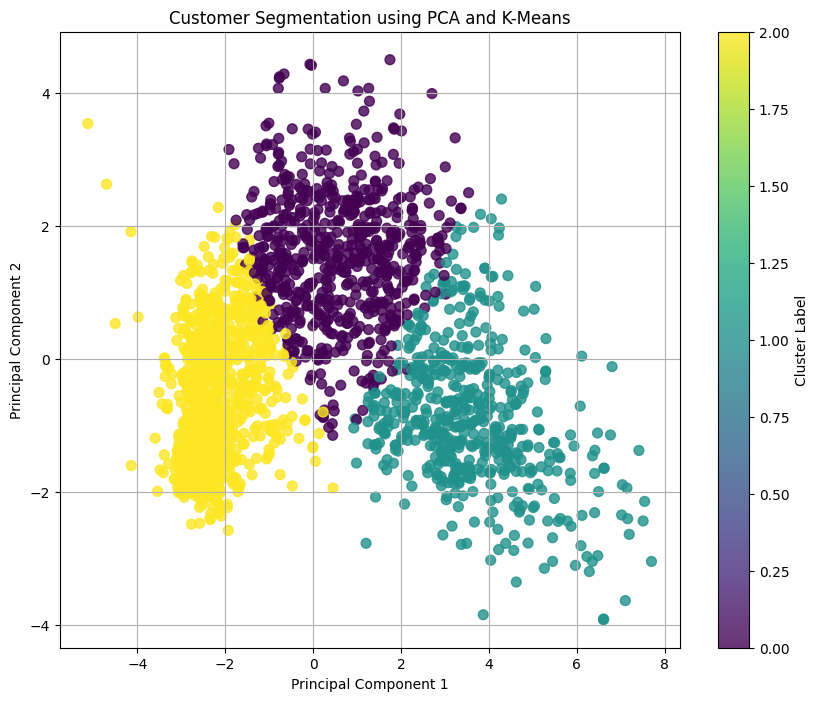

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert PCA results to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Add the cluster labels to the PCA DataFrame for plotting
df_pca['cluster_label'] = df['cluster_label']

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster_label'], cmap='viridis', s=50, alpha=0.8)

# Add labels and title
plt.title('Customer Segmentation using PCA and K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)

# Display the plot
plt.show()

## Analyze and interpret the clusters



In [14]:
import numpy as np

# Select only numerical columns from the original DataFrame
numerical_df = df.select_dtypes(include=np.number)

# Group by cluster label and calculate the mean of numerical features
cluster_analysis = numerical_df.groupby(df['cluster_label']).mean()

# Display the mean values for each cluster
display(cluster_analysis)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_label
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,5400.058282,1964.371166,58216.259219,0.207055,0.911043,47.972393,458.619632,24.457055,139.286810,32.973926,...,0.062883,0.133436,0.013804,0.029141,0.013804,0.009202,3.0,11.0,0.105828,0.0
1,5711.767273,1968.654545,77667.594555,0.041818,0.143636,49.600000,614.549091,68.810909,470.627273,100.649091,...,0.081818,0.130909,0.280000,0.225455,0.034545,0.003636,3.0,11.0,0.303636,1.0
2,5649.448940,1971.671484,35028.579014,0.806358,0.444123,49.563584,42.190751,4.937380,23.418112,6.937380,...,0.074181,0.007707,0.000000,0.000963,0.001927,0.012524,3.0,11.0,0.094412,2.0


**Reasoning**:
Analyze and interpret the characteristics of each cluster based on the mean values calculated in the previous step. This involves examining the differences in key features across clusters to identify distinct customer segments.



In [15]:
# Print a summary of the cluster characteristics based on the mean values
print("Cluster Analysis Summary:")
print("\nCluster 0:")
print("- Average Income: {:.2f}".format(cluster_analysis.loc[0, 'Income']))
print("- Average Spending (Total Mnt): {:.2f}".format(cluster_analysis.loc[0, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()))
print("- Average Kidhome: {:.2f}".format(cluster_analysis.loc[0, 'Kidhome']))
print("- Average Teenhome: {:.2f}".format(cluster_analysis.loc[0, 'Teenhome']))
print("- Campaign Acceptance (Avg AcceptedCmp): {:.2f}".format(cluster_analysis.loc[0, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()))


print("\nCluster 1:")
print("- Average Income: {:.2f}".format(cluster_analysis.loc[1, 'Income']))
print("- Average Spending (Total Mnt): {:.2f}".format(cluster_analysis.loc[1, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()))
print("- Average Kidhome: {:.2f}".format(cluster_analysis.loc[1, 'Kidhome']))
print("- Average Teenhome: {:.2f}".format(cluster_analysis.loc[1, 'Teenhome']))
print("- Campaign Acceptance (Avg AcceptedCmp): {:.2f}".format(cluster_analysis.loc[1, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()))

print("\nCluster 2:")
print("- Average Income: {:.2f}".format(cluster_analysis.loc[2, 'Income']))
print("- Average Spending (Total Mnt): {:.2f}".format(cluster_analysis.loc[2, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()))
print("- Average Kidhome: {:.2f}".format(cluster_analysis.loc[2, 'Kidhome']))
print("- Average Teenhome: {:.2f}".format(cluster_analysis.loc[2, 'Teenhome']))
print("- Campaign Acceptance (Avg AcceptedCmp): {:.2f}".format(cluster_analysis.loc[2, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()))

Cluster Analysis Summary:

Cluster 0:
- Average Income: 58216.26
- Average Spending (Total Mnt): 742.22
- Average Kidhome: 0.21
- Average Teenhome: 0.91
- Campaign Acceptance (Avg AcceptedCmp): 0.05

Cluster 1:
- Average Income: 77667.59
- Average Spending (Total Mnt): 1402.71
- Average Kidhome: 0.04
- Average Teenhome: 0.14
- Campaign Acceptance (Avg AcceptedCmp): 0.15

Cluster 2:
- Average Income: 35028.58
- Average Spending (Total Mnt): 97.85
- Average Kidhome: 0.81
- Average Teenhome: 0.44
- Campaign Acceptance (Avg AcceptedCmp): 0.02
